In [1]:
# Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=13
matplotlib.rcParams['figure.figsize']=(36,20)
matplotlib.rcParams['figure.facecolor']='white'

import warnings
warnings.filterwarnings('ignore')


In [2]:
video_games = pd.read_csv('Video_Games.csv')

#check the csv for nulls
video_games.isnull().values.any()

True

In [3]:
#So we find some null values in the csv so I'll manually go through some of the columns to check for nulls
video_games['Global_Sales'].isnull().values.any()
video_games['NA_Sales'].isnull().values.any()
video_games['Critic_Score'].isnull().values.any() #This has null values
video_games['Critic_Count'].isnull().values.any() #This has null values
video_games['User_Score'].isnull().values.any() #This has null values
video_games['User_Count'].isnull().values.any() #This has null values
video_games['Rating'].isnull().values.any() #This has null values


#At this point I will clean the null values by dropping the rows with null values


True

In [4]:
nan_df = video_games.isna()
nan_counts = video_games.isna().sum()
print(nan_counts)


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [5]:
#Check for nan values
nan_df = video_games.isna()
nan_counts = video_games.isna().sum()
print(nan_counts)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [6]:
# Columns that appear to have empty/white space/NaN values
columns_with_empty = ['Name', 'Year_of_Release', 'Genre',
                      'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score',
                      'User_Count', 'Developer', 'Rating']

# Replace empty spaces with NaN
for column in columns_with_empty:
    video_games[column] = video_games[column].replace(r'^\s*$', np.nan, regex=True)

# Drop rows containing NaN values in the specified columns
video_games = video_games.dropna(subset=columns_with_empty)

In [7]:
#I will drop the rows that have null values as the null values are most likely to be obscure games that have little to no reviews as well as low sales.
#I will later verify this by checking metacritic for the highest user and critic score

video_games.dropna(subset=['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating'], inplace=True)


In [8]:
#Here we'll find some general info on the dataset post cleaning
video_games.describe()


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [9]:
video_games.shape

(6825, 16)

In [10]:
#Section 2 Adding Columns for Analysis
#I'm interested in a column that averages out critic and user score. 
#There is one issue user score is from 0-10 while critic score is 0-100. So I will multiply user score by a factor of 10 for this demonstration.


#When attempting to average out, I would get an error so I have to check the data types. Initially they returned object and float.
#Both have to be float So I ended up converting them.
print(video_games['User_Score'].dtypes)
print(video_games['Critic_Score'].dtypes)


object
float64


In [11]:
# Convert to float
video_games['User_Score'] = pd.to_numeric(video_games['User_Score'], errors='coerce')
video_games['Critic_Score'] = pd.to_numeric(video_games['Critic_Score'], errors='coerce')

In [12]:
#Check data types again
print(video_games['User_Score'].dtypes)
print(video_games['Critic_Score'].dtypes)

float64
float64


In [13]:
# Adjusting the user score scale
video_games['Adjusted_User_Score'] = video_games['User_Score'] * 10

In [14]:
# Calculating the average score
video_games['Average_Score'] = (video_games['Critic_Score'] + video_games['Adjusted_User_Score']) / 2

In [15]:
#Checking if the column was added succesfully and if it makes sense
video_games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Adjusted_User_Score,Average_Score
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344,71.856264,71.064176
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538,14.399417,12.564423
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,5.000000,11.500000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000,65.000000,64.500000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000,75.000000,73.500000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000,82.000000,80.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000,96.000000,95.000000


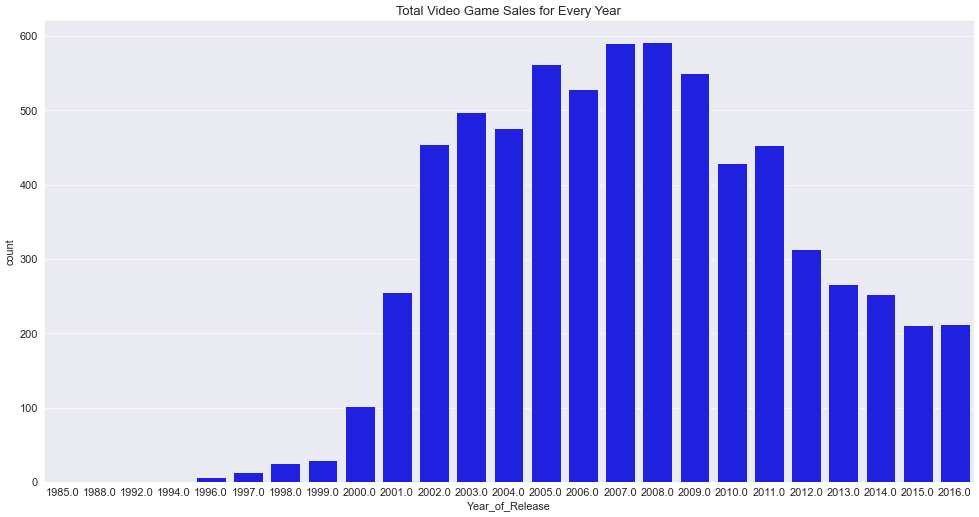

In [16]:
#Now that this makes sense I can move onto visualizing the data and interpretation
plt.figure(figsize=(20,10),dpi=60)
sns.countplot(x=video_games['Year_of_Release'], color='blue')
plt.title('Total Video Game Sales for Every Year')
plt.show()

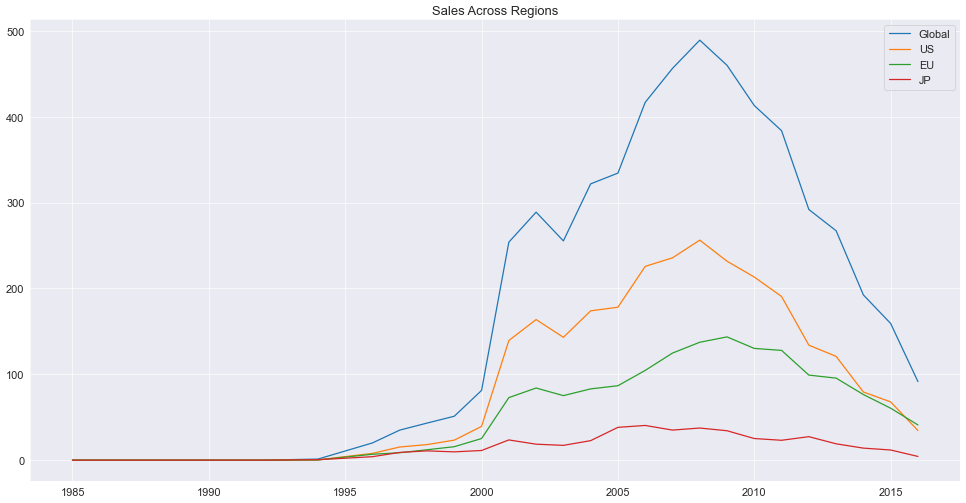

In [17]:
#Now lets answer some questions that I am trying to answer by visualizing the data
video_games1=video_games.groupby('Year_of_Release',as_index=False).sum()
plt.figure(figsize=(20,10),dpi=60)
x_axis=video_games1['Year_of_Release']
y_axis=video_games1['Global_Sales']

na=video_games1['NA_Sales']
eu=video_games1['EU_Sales']
jp=video_games1['JP_Sales']
total=video_games1['Global_Sales']


plt.plot(x_axis, total, label='Global')
plt.plot(x_axis, na, label='US')
plt.plot(x_axis, eu, label='EU')
plt.plot(x_axis, jp, label='JP')
plt.title('Sales Across Regions')
plt.legend(bbox_to_anchor=(1,1))

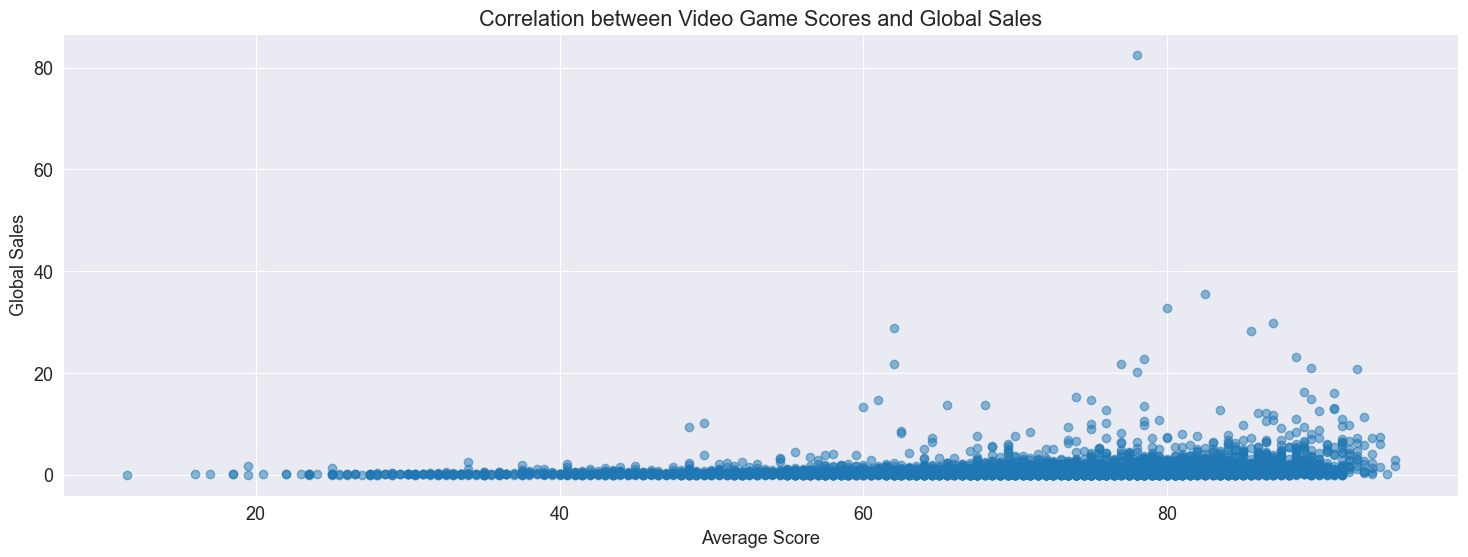

In [18]:
plt.figure(figsize=(18,6))

average = video_games['Average_Score']
global_sales = video_games['Global_Sales']
# Create a scatter plot
plt.scatter(average, global_sales, alpha=0.5)
plt.xlabel('Average Score')
plt.ylabel('Global Sales')
plt.title('Correlation between Video Game Scores and Global Sales')
plt.show()

#This shows that video game ratings whether by critic or user do largely affect video gamee sales.

In [19]:
#This is the highest rated game of all time (metacritic).
top_game = video_games.sort_values(by='Critic_Score', ascending=False).iloc[0]
top_game

Name                   Tony Hawk's Pro Skater 2
Platform                                     PS
Year_of_Release                          2000.0
Genre                                    Sports
Publisher                            Activision
NA_Sales                                   3.05
EU_Sales                                   1.41
JP_Sales                                   0.02
Other_Sales                                 0.2
Global_Sales                               4.68
Critic_Score                               98.0
Critic_Count                               19.0
User_Score                                  7.7
User_Count                                299.0
Developer               Neversoft Entertainment
Rating                                        T
Adjusted_User_Score                        77.0
Average_Score                              87.5
Name: 227, dtype: object

In [20]:
#To Check the highest rated game via Adjusted_User score
top_game1 = video_games.sort_values(by='Adjusted_User_Score', ascending=False).iloc[0]
top_game1

#I'm noticing that the user count is pretty low, would this change the user score if the user count was lets say over 50?

Name                   Harvest Moon: Friends of Mineral Town
Platform                                                 GBA
Year_of_Release                                       2003.0
Genre                                             Simulation
Publisher                                            Ubisoft
NA_Sales                                                0.34
EU_Sales                                                0.13
JP_Sales                                                0.11
Other_Sales                                             0.01
Global_Sales                                            0.59
Critic_Score                                            81.0
Critic_Count                                            25.0
User_Score                                               9.6
User_Count                                             116.0
Developer                                               TOSE
Rating                                                     E
Adjusted_User_Score     

In [54]:
#To Check the highest rated game via Adjusted_User score with user count over 200
filtered_games = video_games[video_games['User_Count'] > 200]
top_game1 = filtered_games.sort_values(by='Adjusted_User_Score', ascending=False).iloc[0]
top_game1
#Harvest moon is now the highest rated user scoring game

Name                   Resident Evil 4
Platform                            GC
Year_of_Release                 2005.0
Genre                           Action
Publisher                       Capcom
NA_Sales                          0.98
EU_Sales                          0.42
JP_Sales                          0.22
Other_Sales                       0.06
Global_Sales                      1.69
Critic_Score                      96.0
Critic_Count                      82.0
User_Score                         9.4
User_Count                       767.0
Developer                       Capcom
Rating                               M
Adjusted_User_Score               94.0
Average_Score                     95.0
Name: 1068, dtype: object

In [22]:
#Now to check the highest rated game via the newly added Average_Score column
top_game2 = video_games.sort_values(by='Average_Score', ascending=False).iloc[0]
top_game2

#I dont have to filter for critic or user count here as the counts are already high here.

Name                   Metroid Prime
Platform                          GC
Year_of_Release               2002.0
Genre                        Shooter
Publisher                   Nintendo
NA_Sales                        1.96
EU_Sales                        0.67
JP_Sales                         0.1
Other_Sales                     0.09
Global_Sales                    2.82
Critic_Score                    97.0
Critic_Count                    70.0
User_Score                       9.3
User_Count                     747.0
Developer              Retro Studios
Rating                             T
Adjusted_User_Score             93.0
Average_Score                   95.0
Name: 517, dtype: object

In [23]:
#Checking the top 20 most sold games from 2007 to 2015
top_2007_2016_games = video_games.loc[(video_games['Year_of_Release'] >= 2007) & (video_games['Year_of_Release'] <= 2016)]

top_2007_2016_games.sort_values('Global_Sales',ascending=False).head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Adjusted_User_Score,Average_Score
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,83.0,82.5
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,80.0,80.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,84.0,85.5
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E,77.0,78.5
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,63.0,62.0
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E,74.0,77.0
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,82.0,89.5
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M,81.0,89.0
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M,34.0,61.0
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M,63.0,75.0


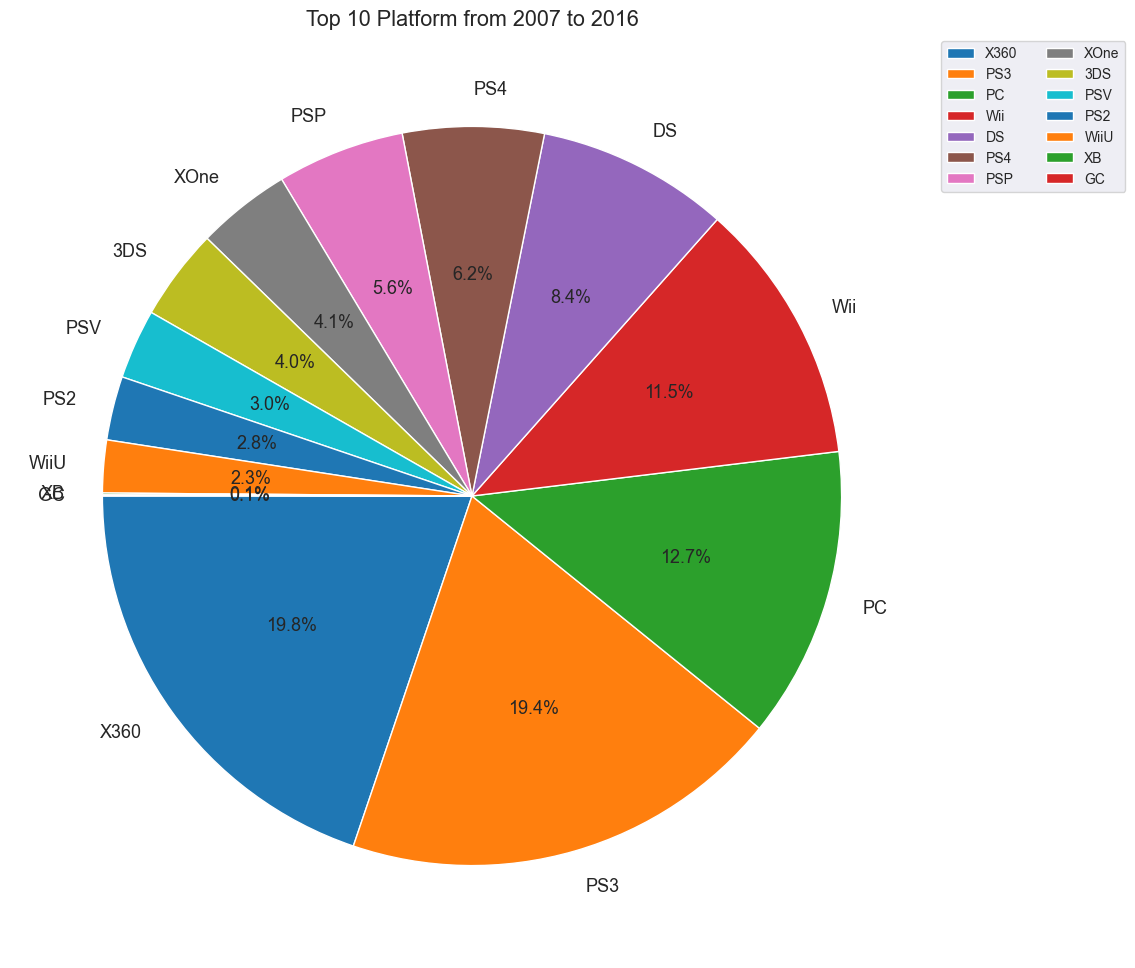

In [24]:
#Showcasing the most popular gaming platforms from 2007 to 2016
platform_amount=top_2007_2016_games['Platform'].value_counts()
platform_amount

plt.figure(figsize=(24,12))
plt.title('Top 10 Platform from 2007 to 2016')
plt.pie(platform_amount,labels=platform_amount.index, autopct='%1.1f%%', startangle=180)
plt.legend(loc=2, fontsize=10,bbox_to_anchor=(1,1),ncol=2)


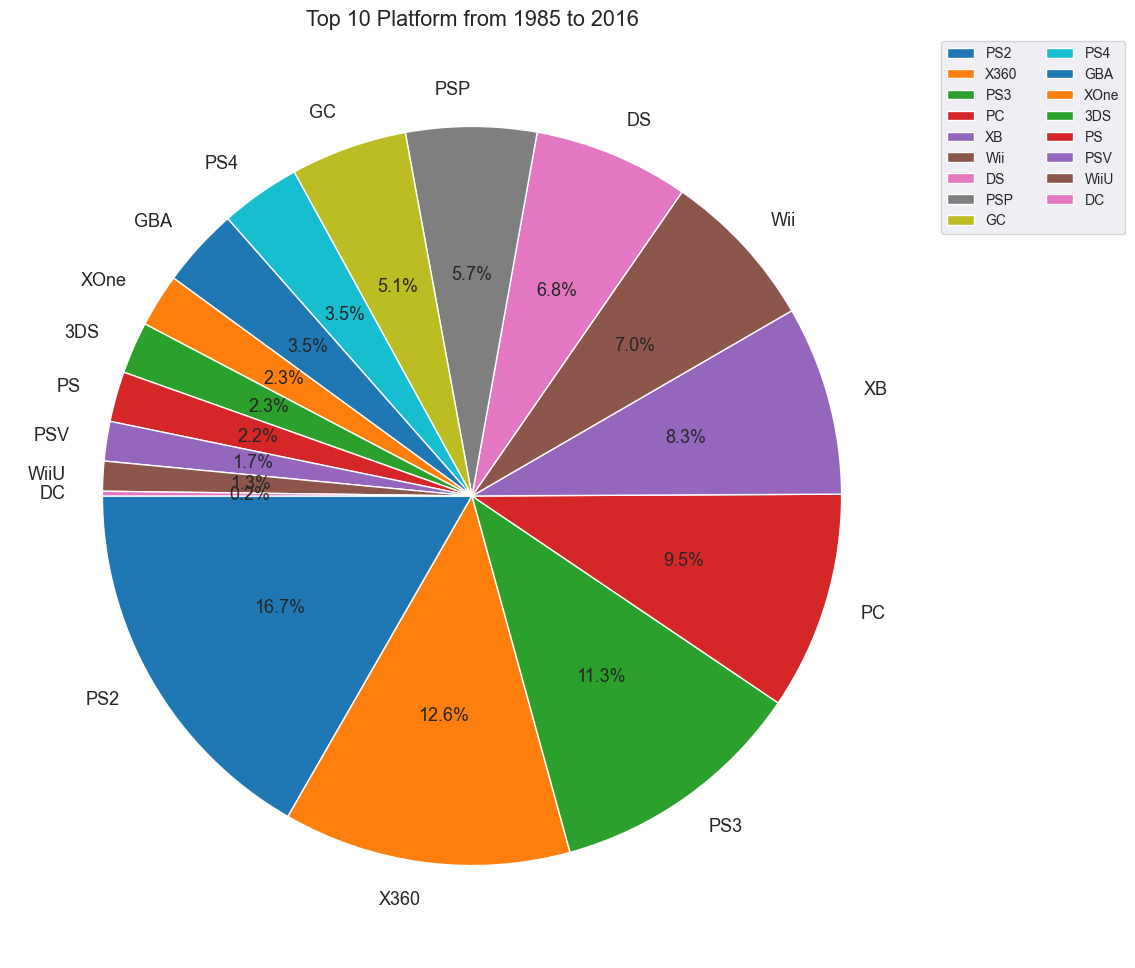

In [25]:
#Showcasing the most popular gaming platforms from 1985 to 2016 (ALL TIME FROM DATA SET)
top_1985_2016_games = video_games.loc[(video_games['Year_of_Release'] >= 1985) & (video_games['Year_of_Release'] <= 2016)]

top_1985_2016_games.sort_values('Global_Sales',ascending=False).head(20)

platform_amount=top_1985_2016_games['Platform'].value_counts()
platform_amount

plt.figure(figsize=(24,12))
plt.title('Top 10 Platform from 1985 to 2016')
plt.pie(platform_amount,labels=platform_amount.index, autopct='%1.1f%%', startangle=180)
plt.legend(loc=2, fontsize=10,bbox_to_anchor=(1,1),ncol=2)

In [26]:
#Show the most popular video game genres by seeing how often they appear in the data
top10_genre=video_games['Genre'].value_counts().head(10)
top10_genre

Genre
Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Name: count, dtype: int64

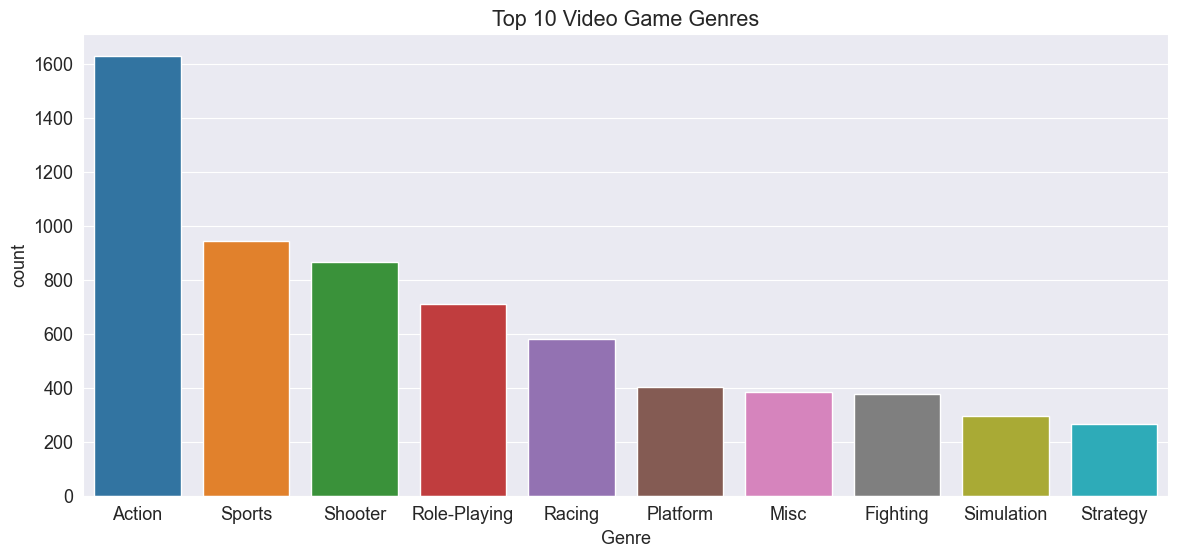

In [27]:
plt.figure(figsize=(14,6))
sns.barplot(x=top10_genre.index, y=top10_genre)
plt.title('Top 10 Video Game Genres')
plt.show()

In [28]:
#Check Data types before making a correlation matrix
print(video_games.dtypes)

Name                    object
Platform                object
Year_of_Release        float64
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
Critic_Score           float64
Critic_Count           float64
User_Score             float64
User_Count             float64
Developer               object
Rating                  object
Adjusted_User_Score    float64
Average_Score          float64
dtype: object


In [29]:
# Perform one-hot encoding
video_games_encoded = pd.get_dummies(video_games, columns=['Platform', 'Genre', 'Rating'])

# Drop the 'Developer' and 'Name' columns
video_games_encoded = video_games_encoded.drop(['Publisher', 'Developer', 'Name'], axis=1)

# Compute the correlation matrix
correlation_matrix = video_games_encoded.corr()


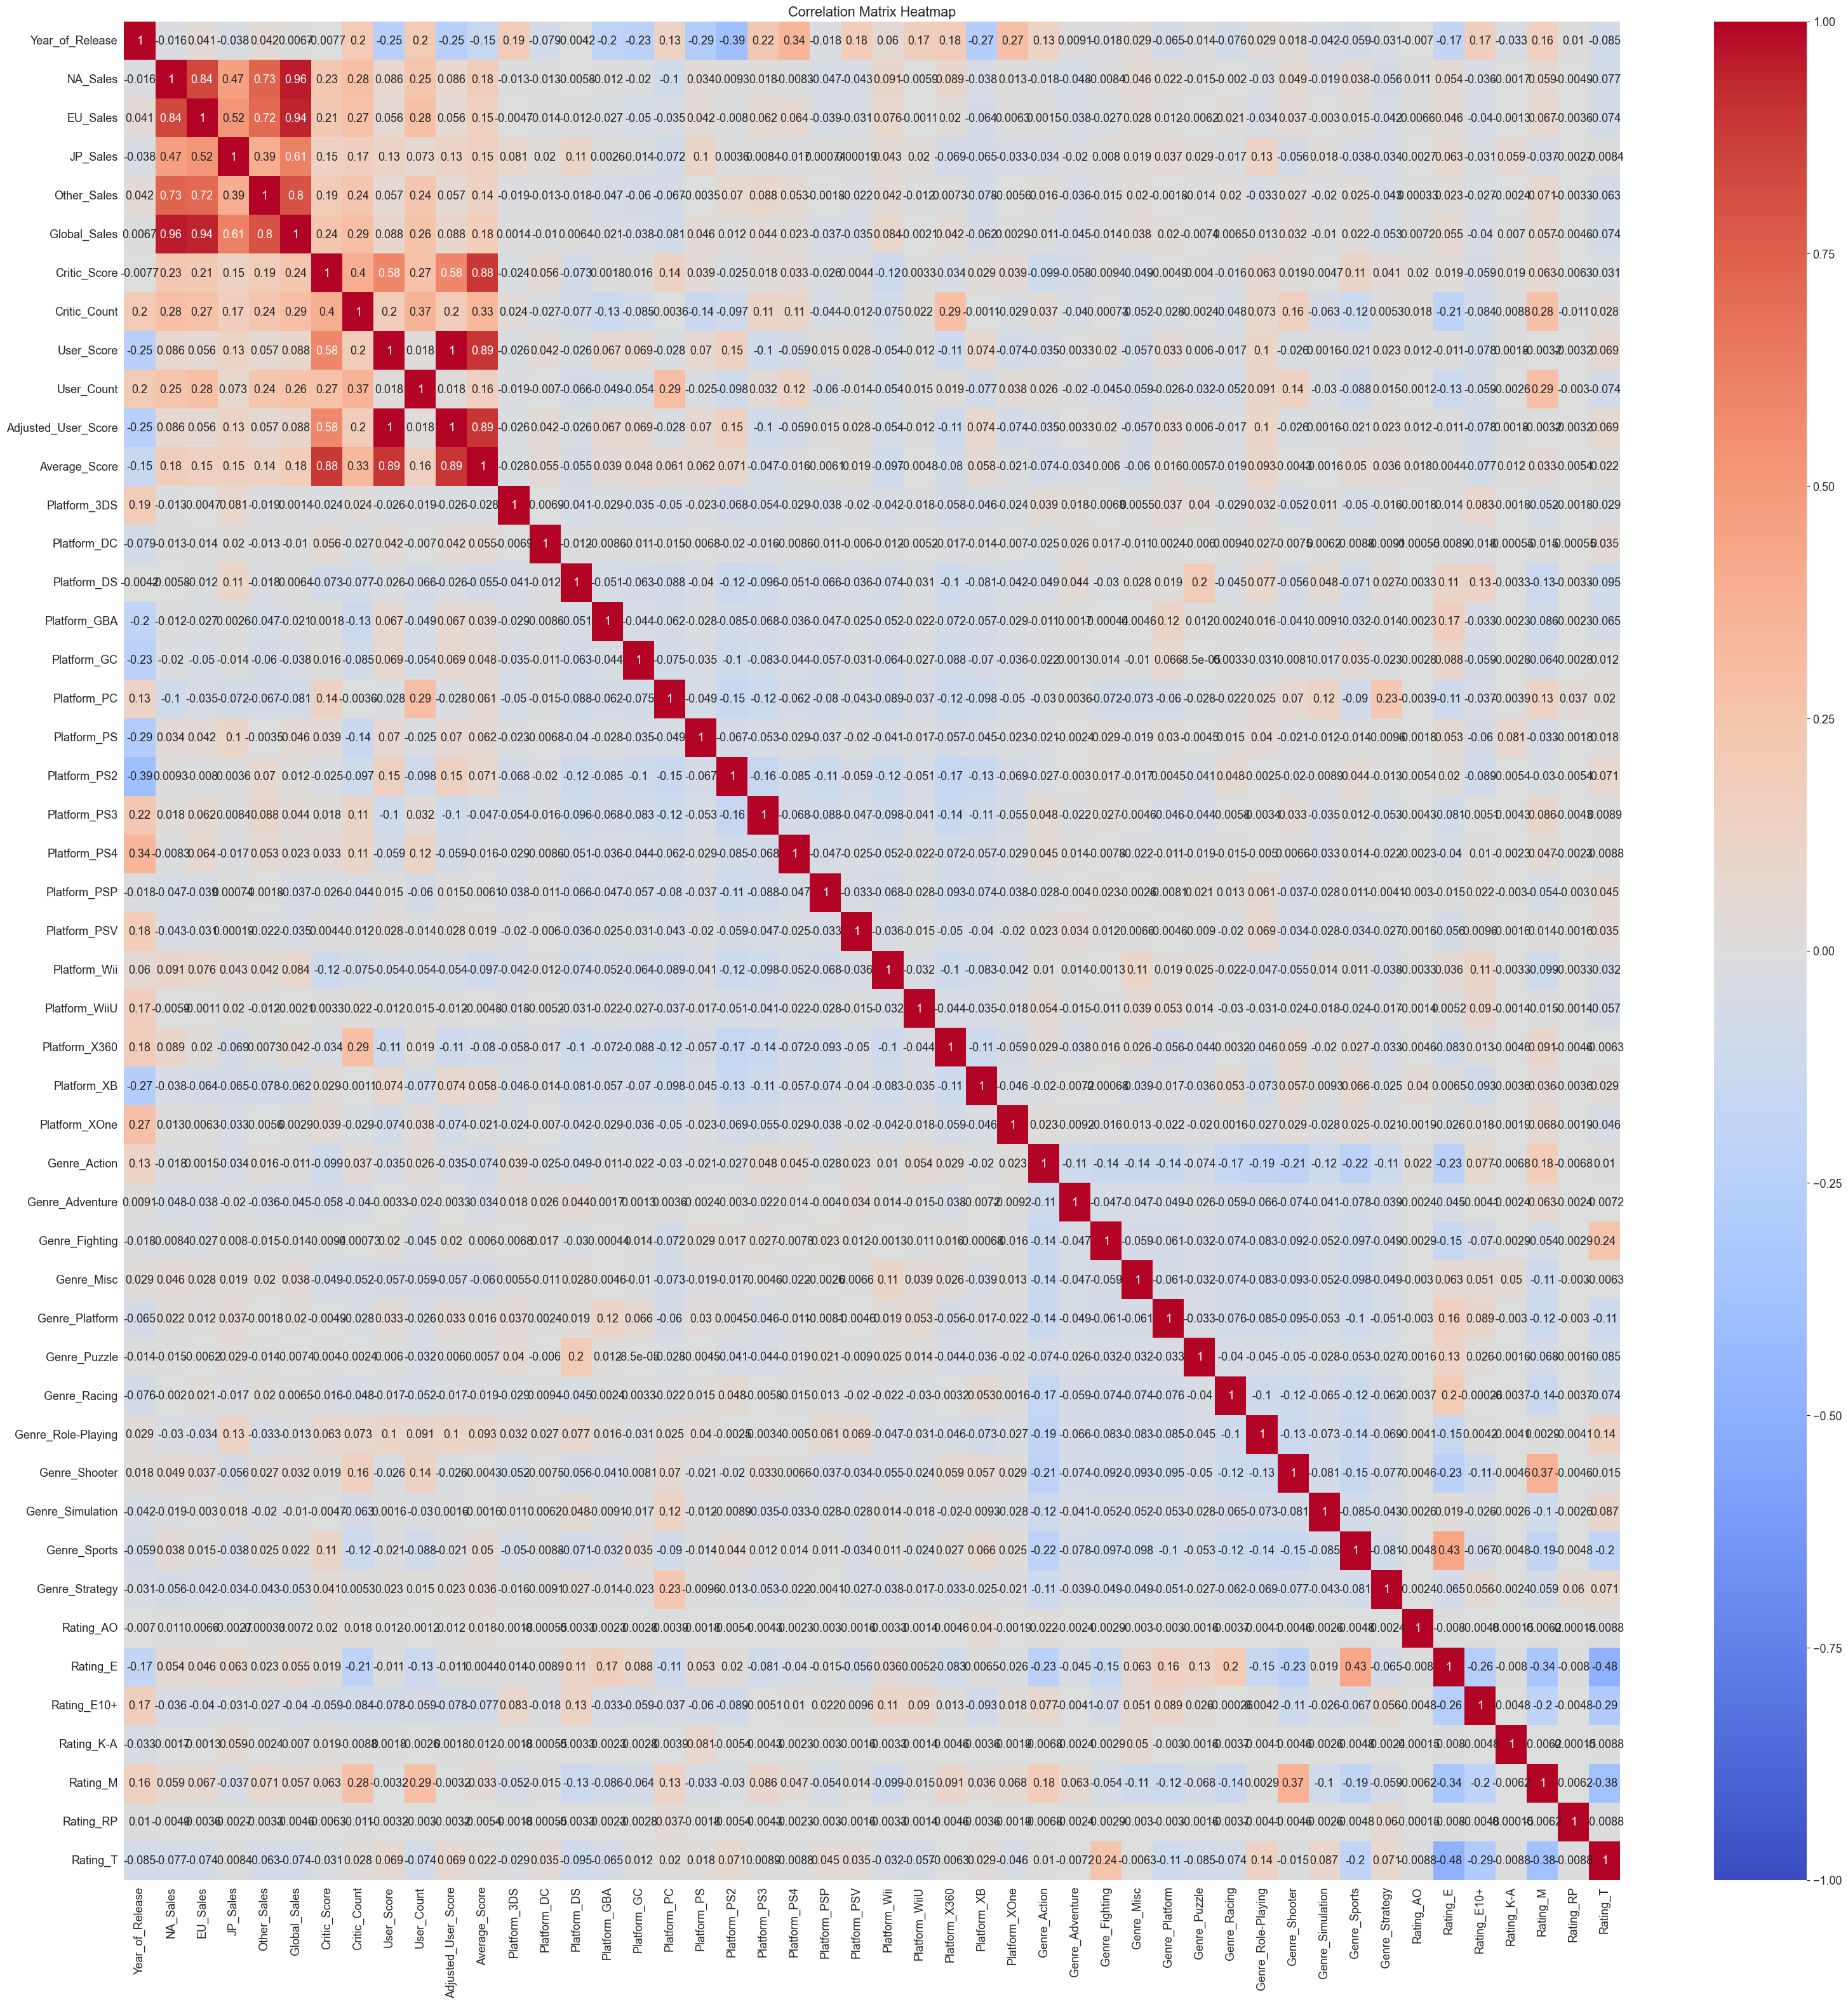

In [30]:
#Visualizaing correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = video_games_encoded.corr()


plt.figure(figsize=(38, 38))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

For the correlation matrix there is plenty of correlation to go around. In focusing on the one hot encoded variables, we can see that platform choice can often correlate to certain ratings as well as certain genres. The ratings can correlate with each other. Sales also correlate heavily so I will be removing some of the sales such as global sales from the cluster modeling. I'll also be removing user score and and adjusted user score since I'll be focusing on average score when it comes to the ratings.

In [50]:
# Drop the 'Developer' and 'Name' columns
#video_games_encoded = video_games_encoded.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Score', 'Adjusted_User_Score'], axis=1)

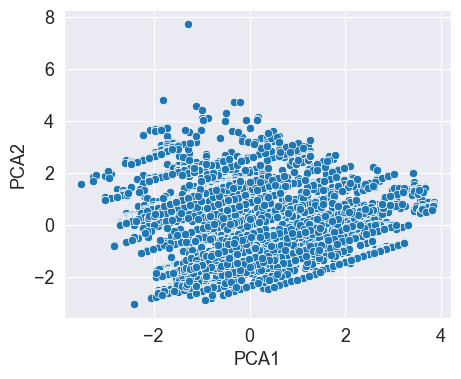

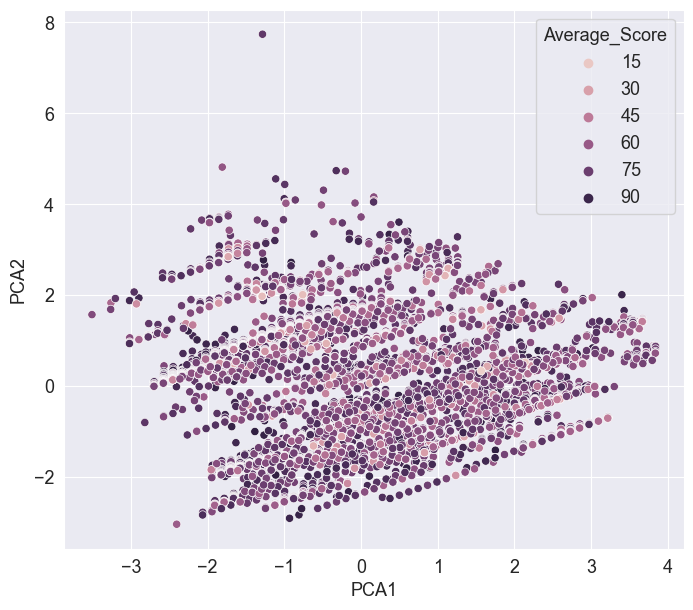

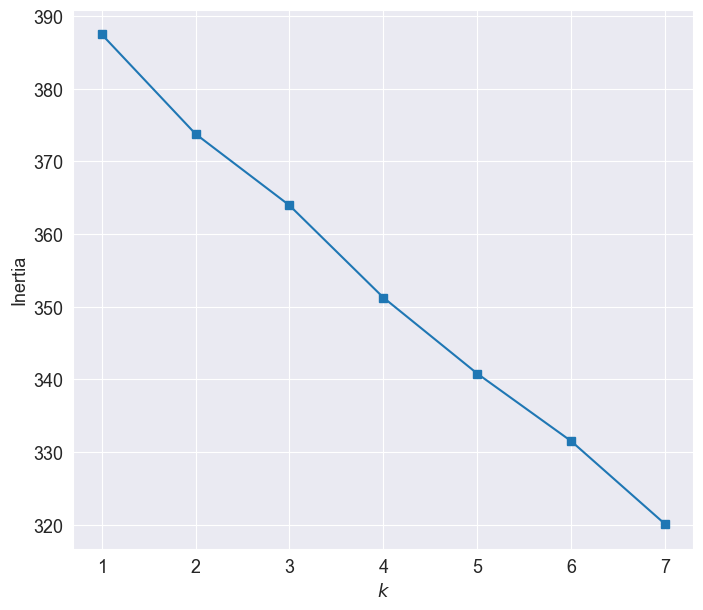

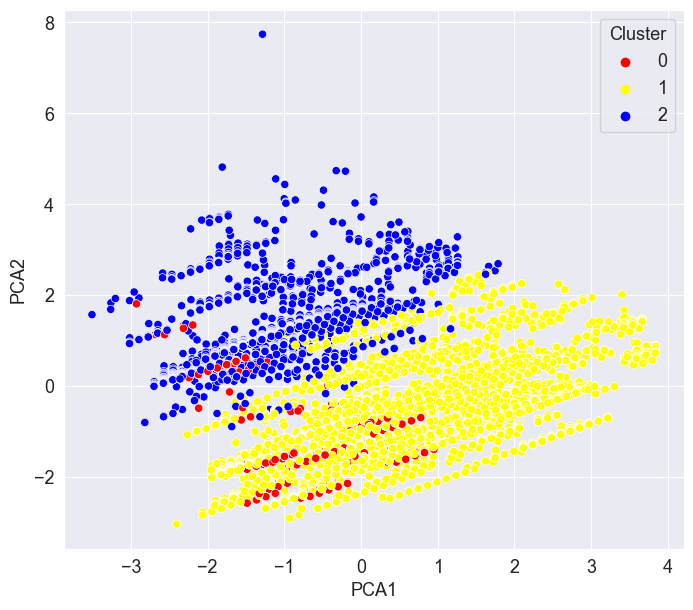

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# Normalizing the features
scaler = StandardScaler()
features = video_games_encoded[['Global_Sales','Year_of_Release','Platform_3DS', 'Platform_PC', 'Platform_PS4','Platform_XB',
                                'Platform_PS2','Platform_PSV','Platform_Wii', 'Platform_WiiU','Platform_X360',
                                'Platform_XOne','Genre_Adventure','Genre_Action','Genre_Puzzle',
                                'Genre_Role-Playing','Genre_Shooter','Genre_Strategy','Genre_Misc',
                                'Rating_E','Rating_M','Rating_T']]
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_mdl, columns=['PCA1', 'PCA2'])

# Merge the PCA results and the 'Average_Score' for visualization
video_games_pca = video_games_encoded[['Average_Score']].reset_index(drop=True)
result_df = pd.concat([video_games_pca, pca_df], axis=1)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=1).fit(X_scaled)
result_df['Cluster'] = kmeans.labels_

# Visualize the results of PCA
plt.figure(figsize=(5, 4))
sns.scatterplot(x='PCA1', y='PCA2', data=result_df)
plt.show()

# Visualize the results with the 'Average_Score' as hue
plt.figure(figsize=(8, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Average_Score', data=result_df)
plt.show()

# Use the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.figure(figsize=(8, 7))
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.show()

# Custom color palette for seaborn
cluster_colors = {0: 'red', 1: 'yellow', 2: 'blue'}

# Visualize the clusters with custom colors
plt.figure(figsize=(8, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette=cluster_colors, data=result_df)
plt.show()

# Plotly visualization
fig = px.scatter(result_df, x='PCA1', y='PCA2', color='Cluster', hover_data=['Average_Score'])
fig.show()